## Widgets, for interactive plotting in 2D

Widgets are a quick way to get interactivity in your Jupyter displays.

Jupyter has its own version of widgets, based on Python widgets. We use the **interact** command to access them.


In [1]:
from ipywidgets import interact

**First** we define a simple function that the widgets will activate.

In [2]:
def f(x):
    return x


**Next** We create the widgets by calling the **interact** function, using an argument type for **x**. The choice of **x** will give use sliders, check boxes, or text entry boxes.

In [7]:
interact(f,x=(0,10));

7

In [5]:
interact(f,x=(0.0,10.0));

5.8

In [8]:
interact(f,x=True);

False

In [9]:
interact(f,x='Hello World');

'Hello Wkslskdf'

### Plot animations

**Now** let's do some more interesting examples where we get the widget to plot something interesting.

We will import some utility functions for plotting and numerics.

In [10]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *

**First** we define the update function which will plot something interesting for us. In this case we plot the function $$f(x) = x^k$$ for various values of $k$. 

The **show** command in the function is important, to get the plot to display.

In [16]:
x=linspace(0,1)

def update(k=0):
    plot(x,x**k)
    show()

**Now** we can the interact commad using the update function, and a slider.

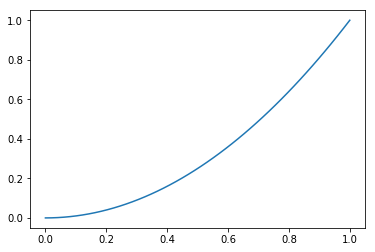

In [18]:
interact(update,k=(1,10));

**We** can do more complex plots with many sliders. For instance, let's explore the sine funciton as it ofter appears in signal processing. It can have an amplitude, frequency and phase. We define the appropriate function and include sliders for this.

$$t\mapsto A\sin(2\pi f t + \phi ).$$

When we define the function, we can include some default values in the argument list.

In [19]:
t = linspace(0,1,1000)

def plot_sine(A=4,f=2,phi=0):
    plot(t,A*sin(2*pi*f*t + phi))
    axis([0,1,-6,6])
    show()

When calling the **interact** function, makes sure the list of parameters have the same name as the action function.

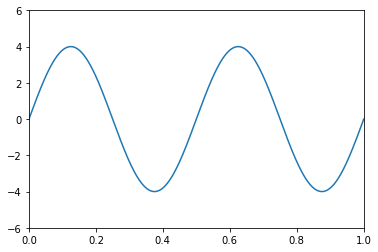

<function __main__.plot_sine>

In [20]:
interact(plot_sine,A=(0,10), f=(1,10), phi=(0,2*pi))

## Other graphics

You are not limited to simple 2D plots. The widgets can control more interesting graphics, as in this network example. (from github.com/jupyter-widgets/ipywidgets )

In [21]:
import networkx as nx

In [22]:
# wrap a few graph generation functions so they have the same signature

def random_lobster(n, m, k, p):
    return nx.random_lobster(n, p, p / m)

def powerlaw_cluster(n, m, k, p):
    return nx.powerlaw_cluster_graph(n, m, p)

def erdos_renyi(n, m, k, p):
    return nx.erdos_renyi_graph(n, p)

def newman_watts_strogatz(n, m, k, p):
    return nx.newman_watts_strogatz_graph(n, k, p)

def plot_random_graph(n, m, k, p, generator):
    g = generator(n, m, k, p)
    nx.draw(g)
    show()

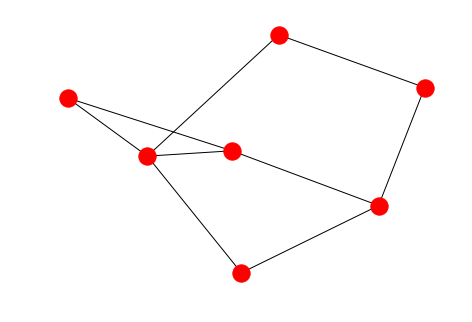

In [24]:
interact(plot_random_graph, n=(2,30), m=(1,10), k=(1,10), p=(0.0, 1.0, 0.001),
         generator={
             'lobster': random_lobster,
             'power law': powerlaw_cluster,
             'Newman-Watts-Strogatz': newman_watts_strogatz,
             u'Erdős-Rényi': erdos_renyi,
         });